<h1>Project: Medical Appointment No Shows</h1>
    <h3>Why Do Patients Miss Their Scheduled Appointments?</h3>

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
## Context
- A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
## Content
- This data set represent more than 100k medical appointments in Brazil and is focused on the question of 
    whether or not patients show up for their appointment.
- A number of characteristics about the patient are included in each row.

## Data Dictionary
<ol>
        <b><li>PatientId</li></b>
            Identification of a patient
        <b><li>AppointmentID</li></b>
            Identification of each appointment
        <b><li>Gender</li></b>
            Male or Female.
        <b><li>ScheduledDay</li></b>
            The day someone called or registered the appointment.
        <b><li>AppointmentDay</li></b>
            The day of the actuall appointment.
        <b><li>Age</li></b>
            How old is the patient.
        <b><li>Neighbourhood</li></b>
            Where the appointment takes place.
        <b><li>Scholarship</li></b>
            if the patient enrolled in a scholarship or not.
        <b><li>Hipertension</li></b>
            if the patient suffer from Hipertension or not.
        <b><li> Diabetes</li></b>
            if the patient suffer from Diabetes or not.
        <b><li>Alcoholism</li></b>
            if the patient has Alcoholic problems.
        <b><li>Handcap</li></b>
            if the patient is Handicap or not, and how many Handicap condition.
        <b><li>SMS_received</li></b>
            if the patient received a reminder sms for the appointment.
        <b><li>No-show</li></b>
            finally the most important variable does the patient did show up for his appointment or not.
</ol>

## Question(s) for Analysis
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

## Import Libraries

In [1]:
# Data Analysis Packages:

import numpy as np
import pandas as pd

# Data Visualization Packages:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


<a id='wrangling'></a>
## Data Wrangling

### Load the data

In [2]:
# Read data set filename
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Check the data

In [3]:
# Check the data set shape (rows and columns)
df.shape

(110527, 14)

- Our data set has 110527 rows and 14 columns.

In [4]:
# Check the data set first few rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Check the data set for dtypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- No missing values.
- Many Columns types need to be fixed, we will take care of it in <a href="#clean">Clean the data</a> section.

In [6]:
# Check the data for duplicated rows
df.duplicated().sum()

0

- No duplicates found in the data set.

In [7]:
# Check the data for unrealistic numeric data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- PatientId and AppointmentID should be a string types since they don't have any numeric usability.
- Min Age is less than 0, this can't be right and must be dropped from data set.
- Max Age is 115 and per https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people this could be possible.
- Handcap has min of 0 (for non Handicap) and 1 to 4 values (for the number of Handicap conditions in each patient).

<a id='clean'></a>
### Clean the data

- We will change patient ID and Appointment ID to a string type (since they do not have any numeric usability)

In [8]:
# Fix PatientId type
df['PatientId'] = df['PatientId'].astype(int) #to drop the .0 of the float type
df['PatientId'] = df['PatientId'].astype(str) #to change the type to string

In [9]:
# Fix AppointmentID type
df['AppointmentID'] = df['AppointmentID'].astype(str)

- While inspecting the data set, we noticed that we need to change ScheduledDay and AppointmentDay types to datetime.
- Also we noticed that the AppointmentDay time are all set to 0s, so we will drop the time from both variables since we don't have the actual AppointmentDay time and the ScheduledDay time has no effect on weither the patient will Show-up.

In [10]:
# Fix ScheduledDay type and time data
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

In [11]:
# Fix AppointmentDay type and time data
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

- Will drop the negative Age

In [12]:
# Fix Age range
df[df['Age'] < 0] # check for age less than 0

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
df = df.drop(index= 99832) # drop age less than 0 by index
df[df['Age'] < 0] # Verify that age less than 0 was dropped from data set.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### Add Required Column(s)

- We will add a week day column to check if there is a specific day of the week patient doesnt Show up fot there appointment.

In [14]:
# Add WeekDay column
df['WeekDay'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

- We will add an awaiting day column to check if longer awaiting days from schedule the appointment to the actual day of the appoinntment affect the Show up forappointment.

In [15]:
# Add AwaitingDay(s) column
df['AwaitingDay(s)'] = df['AppointmentDay'] - df['ScheduledDay']

In [16]:
# Check for unrealistic data in AwaitingDay(s) column.
df[df['AwaitingDay(s)'] < '0 days']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WeekDay,AwaitingDay(s)
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Monday,-1 days
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Tuesday,-1 days
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Wednesday,-1 days
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday,-6 days
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Tuesday,-1 days


In [17]:
# Get the indexes to drop from data set.
drop_index = df[df['AwaitingDay(s)'] < '0 days'].index
drop_index

Int64Index([27033, 55226, 64175, 71533, 72362], dtype='int64')

In [18]:
# Drop the indexes
df = df.drop(drop_index)
df[df['AwaitingDay(s)'] < '0 days'] # Verify indexes have been dropped

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WeekDay,AwaitingDay(s)


In [19]:
#fix the index after deleting rows
df = df.reset_index(drop=True)

In [20]:
# Re-arrange data set column labels
df = df[['PatientId', 'AppointmentID', 'Gender', 'Age', 'ScheduledDay',
       'AppointmentDay', 'WeekDay', 'AwaitingDay(s)', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']]
df.head(1) # Check the new arrangement of the columns

,PatientId,AppointmentID,Gender,Age,ScheduledDay,AppointmentDay,WeekDay,AwaitingDay(s),Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,62,2016-04-29,2016-04-29,Friday,0 days,JARDIM DA PENHA,0,1,0,0,0,0,No


### Data set check after cleaning.

In [21]:
# data set shape
df.shape

(110521, 16)

- Our data set now has 110521 rows and 16 columns.

In [22]:
# Check the data set first few rows
df.head()

,PatientId,AppointmentID,Gender,Age,ScheduledDay,AppointmentDay,WeekDay,AwaitingDay(s),Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,62,2016-04-29,2016-04-29,Friday,0 days,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,56,2016-04-29,2016-04-29,Friday,0 days,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,62,2016-04-29,2016-04-29,Friday,0 days,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,8,2016-04-29,2016-04-29,Friday,0 days,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,56,2016-04-29,2016-04-29,Friday,0 days,JARDIM DA PENHA,0,1,1,0,0,0,No


In [23]:
# Check the data set for dtypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   PatientId       110521 non-null  object         
 1   AppointmentID   110521 non-null  object         
 2   Gender          110521 non-null  object         
 3   Age             110521 non-null  int64          
 4   ScheduledDay    110521 non-null  object         
 5   AppointmentDay  110521 non-null  object         
 6   WeekDay         110521 non-null  object         
 7   AwaitingDay(s)  110521 non-null  timedelta64[ns]
 8   Neighbourhood   110521 non-null  object         
 9   Scholarship     110521 non-null  int64          
 10  Hipertension    110521 non-null  int64          
 11  Diabetes        110521 non-null  int64          
 12  Alcoholism      110521 non-null  int64          
 13  Handcap         110521 non-null  int64          
 14  SMS_received    1105

In [24]:
# Check the data for unrealistic numeric data
df.describe()

,Age,AwaitingDay(s),Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110521.000000,110521,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,10 days 04:25:27.412889858,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043
std,23.109885,15 days 06:07:25.262183605,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879
min,0.000000,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,4 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,15 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,179 days 00:00:00,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Building functions to avoid repeating code

In [25]:
#building plot function
def plot_bar(df, xvar, normalize=True, rot=0, kind='bar', figsize=(14,6), log=False):
    df['No-show'].groupby(df[xvar]).value_counts(normalize=normalize).unstack('No-show').plot(kind=kind, rot=rot, width=0.8, figsize=figsize, log=log, edgecolor='black')
    # Add title and format it
    plt.title("Show/No show for {}".format(xvar).title(), fontsize = 16, weight = "bold")
    # Add x label and format it
    plt.xlabel(xvar.title(),fontsize = 12, weight = "bold")
    # Add y label and format it
    plt.ylabel("Frequency".title(),fontsize = 12, weight = "bold")

In [26]:
#building plot function
def plot_hist(df, bins=20, log=False, xlabel= '\nVariable\n'):
    df.hist(bins=bins,log=log, color='c', figsize=(14,6))
    plt.axvline(df.mean(), color='r', linestyle='dashed', linewidth=2, label='Mean: {:.2f}'.format(df.mean()))
    plt.legend()
    plt.xlabel(xlabel=xlabel, fontsize = 12,  weight = "bold")
    plt.ylabel('\nCount\n', fontsize = 12,  weight = "bold");
    

<a id='eda'></a>
## Exploratory Data Analysis

### 1- PatientId Variable

In [27]:
# Check the total number of unique patients
df.PatientId.nunique()

62298

- Number of patients in our data set are 62,298 patient.
- <b>PatientId variable has no effect on predicting the probability of Show/No Show of the patient.</b>

### 2-  AppointmentID Variable

In [28]:
# Check the total number of unique Appointments
df.AppointmentID.nunique()

110521

- AppointmentID variable is consistent.
- <b>AppointmentID variable has no effect on predicting the probability of Show/No Show of the patient.</b>

### 3- Gender Variable

In [29]:
# Check if the sum of the Male and Female is consistent.
df['Gender'].value_counts().sum()

110521

- Gender variable is consistent.

In [30]:
# Check if numbers of Females and males are balanced 
df['Gender'].value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

- Gender variable is unbalanced, much more Female patients than Male patients.
- In order to analys the data we will use proportional (normalize the numbers). 

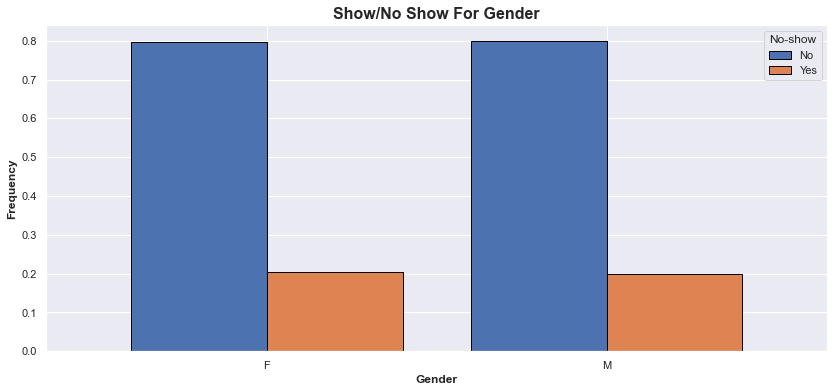

In [31]:
# Check the Show/No Show for Gender variable (after normalizing the numbers) 
plot_bar(df, 'Gender');

- From the plot above, both Females and Males have the same freq. of 0.2 for not showing up.
- So, <b>Gender is not significant patameter for the probability of Show/No Show.</b>

### 4- Age Variable

In [32]:
# Check if Age variable is consistent.
df['Age'].value_counts().sum()

110521

- Age variable is consistent.

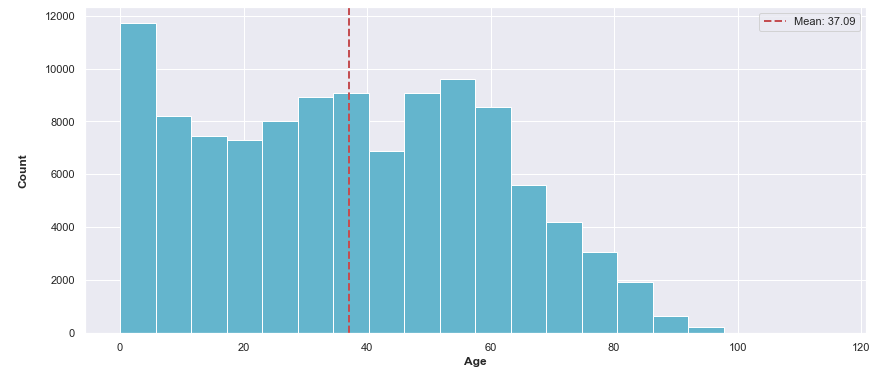

In [33]:
# Plot Histogram for Age to check the balance and mean
plot_hist(df['Age'], xlabel='Age')

- Age is unbalanced as we can see we have much more patient from 0 to 60 than from 70 and above.
- So, for our analysis we will normalize the numbers.

In [34]:
# Check Age (min, max, average and standard deviation)  
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

- Averrage Age is 37 years old

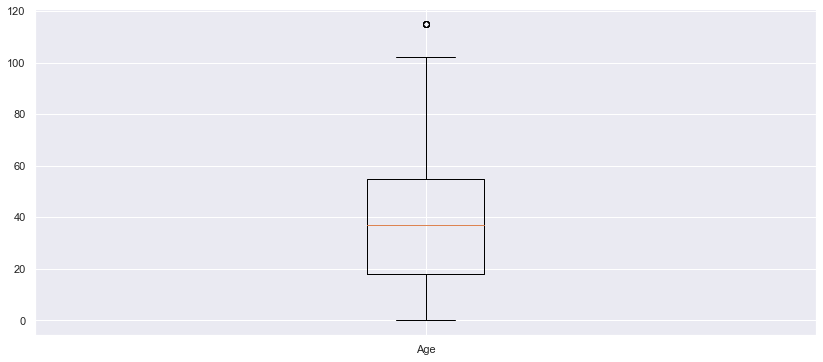

In [35]:
# Box plot for the Age variable
fig = plt.figure(figsize =(14, 6))
age = df['Age']
plt.boxplot(age)
plt.xticks([1], ['Age']);

In [36]:
# Check the number of unique Age values
df['Age'].nunique()

103

- since there is 103 unique value for Age and to better analyis our data set it's better to convert it into Age Groups 
- Source for Age Group categories used, can be found in this link https://ieeexplore.ieee.org/document/6416855

In [37]:
# Convert Age into Age Groups 
bins = [0, 13, 19, 60, 116]
labels = ['Child','Teen','Adult','Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest= True, right= False)

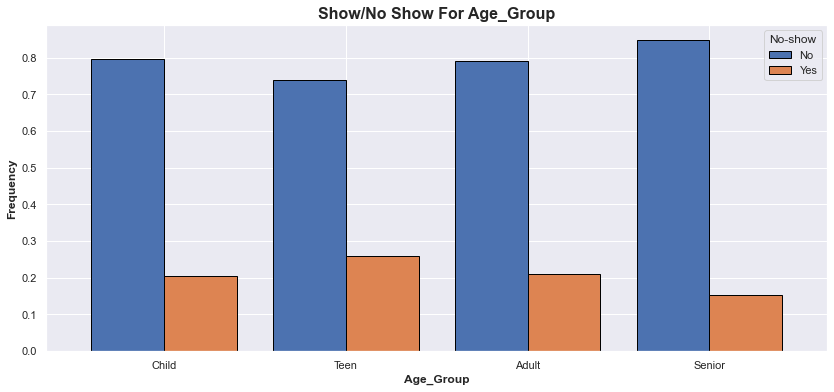

In [38]:
# Check the Show/No Show for Age variable (after normalizing the numbers)
plot_bar(df, 'Age_Group');

- From the plot above,Teen Age has the most probability of not showing up.
- Senior Age has the most probability of showing up.
- So, <b>Age Group is a significant parameter for the probabilty of Show/No Show.</b>

### 5- Days Variables

#### 5.1 Week Day Variable

In [39]:
# Check Appointments made per Week Day
df['WeekDay'].value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: WeekDay, dtype: int64

- The Most busy days are Wednesday, Tuesday and Friday (Mid Week days).
- The Least busy day is Saturday (Weekend), maybe due to weekend and less working hours.
- No appointments made on Sunday (Weekend), most probably it's a Vacation.

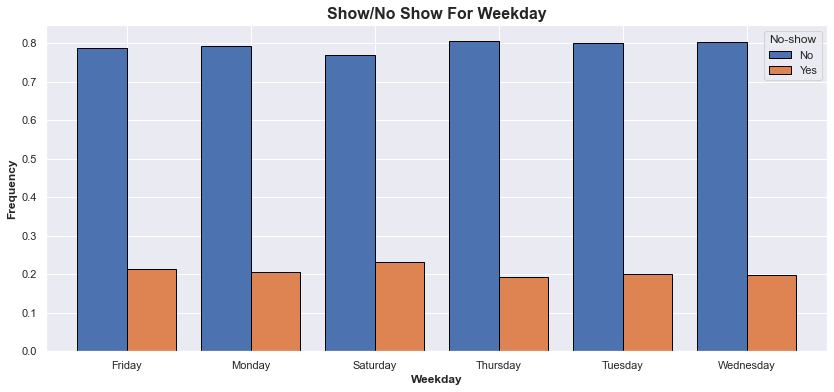

In [40]:
# Check the Show/No Show for WeekDay variable (after normalizing the numbers)
plot_bar(df, 'WeekDay')

- The most probability of No Show is on Saturday which is a Weekend Day.
- There for <b>Weekday is a significant parameter for the probabilty of Show/No Show.</b>

#### 5.2 Awaiting Days Variable

In [41]:
# Convert AwaitingDay(s) to days dtype
df['AwaitingDay(s)'] = df['AwaitingDay(s)'].dt.days


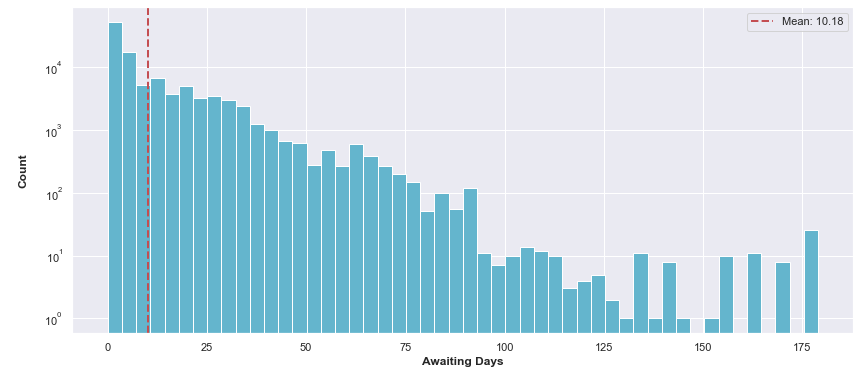

In [42]:
# Plot AwaitingDay(s) histogram with the mean
plot_hist(df['AwaitingDay(s)'], 50, True, xlabel='Awaiting Days')

- The Average Awaiting days is 10 days.
- We can see from the histogram that the data is right skewed.

In [43]:
# Further investigation in Awaiting Days variable
df['AwaitingDay(s)'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: AwaitingDay(s), dtype: float64

- The average awaiting days is 10 days (as mentioned above).
- The Standard Deviation is 15 days.
- The min awaiting days is 0 days (same day appointement).
- The max awaiting days is 179 days.
- for better analysis, we will devide awaiting days into intervals.

In [44]:
# Will devide the awaiting days into intervals
bins = [0,1,4,8,15,22,31,170]
labels = ['Same day', '[1 - 3 days]', '[4 - 7 days]', '[8 - 14 days]', '[15 - 21. days]', '[22 - 30 days]', 'Month+']
df['AwaitingDaysIntervals'] = pd.cut(df['AwaitingDay(s)'], bins=bins, labels=labels, include_lowest=True, right=False)

In [45]:
# Check Appointments made per Awaiting Days intervals
df['AwaitingDaysIntervals'].value_counts()

Same day           38562
[4 - 7 days]       17510
[1 - 3 days]       14675
[8 - 14 days]      12025
Month+             10352
[15 - 21. days]     8874
[22 - 30 days]      8497
Name: AwaitingDaysIntervals, dtype: int64

- Most of the Appointments are made Same Day.

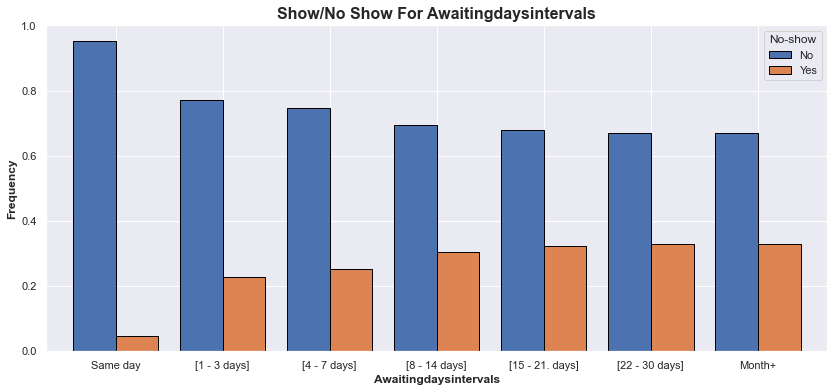

In [46]:
# Check the Show/No Show for Awaiting Days Interval variable (after normalizing the numbers)
plot_bar(df, 'AwaitingDaysIntervals')

- The more awaiting days the more probability of No Show
- <b>The Awaiting Days is a great significant for the probabilty of Show/No Show</b>

### 6- Neighbourhood Variable

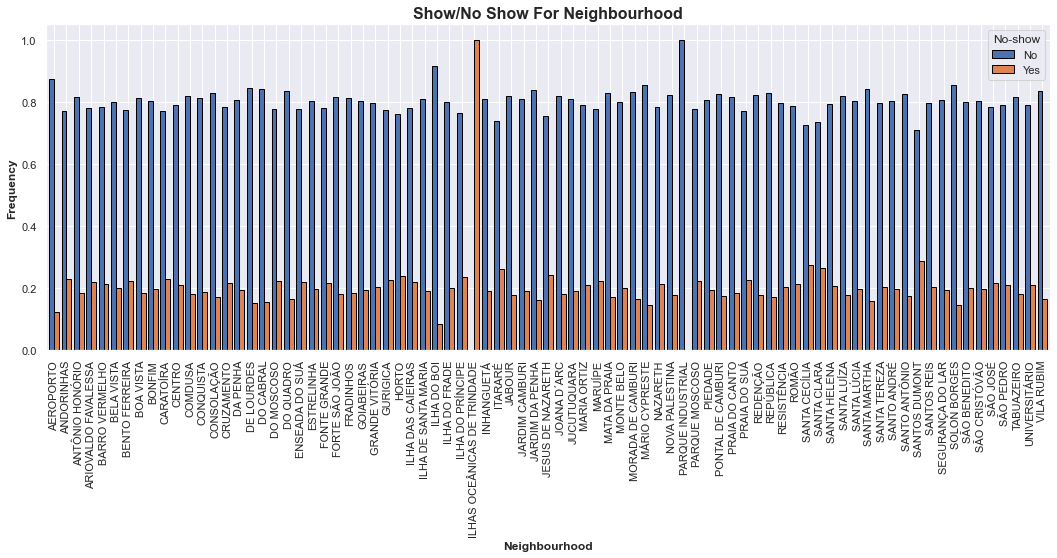

In [47]:
# Check the Show/No Show for Neighbourhood variable (after normalizing the numbers)
plot_bar(df, 'Neighbourhood', rot=90, figsize=(18,6))

- Show/No Show are average for all Neighbourhoods except two Neighbourhoods "ILHAS OCEÂNICAS DE TRINDADE" and "PARQUE INDUSTRIAL", they will need further investigation.

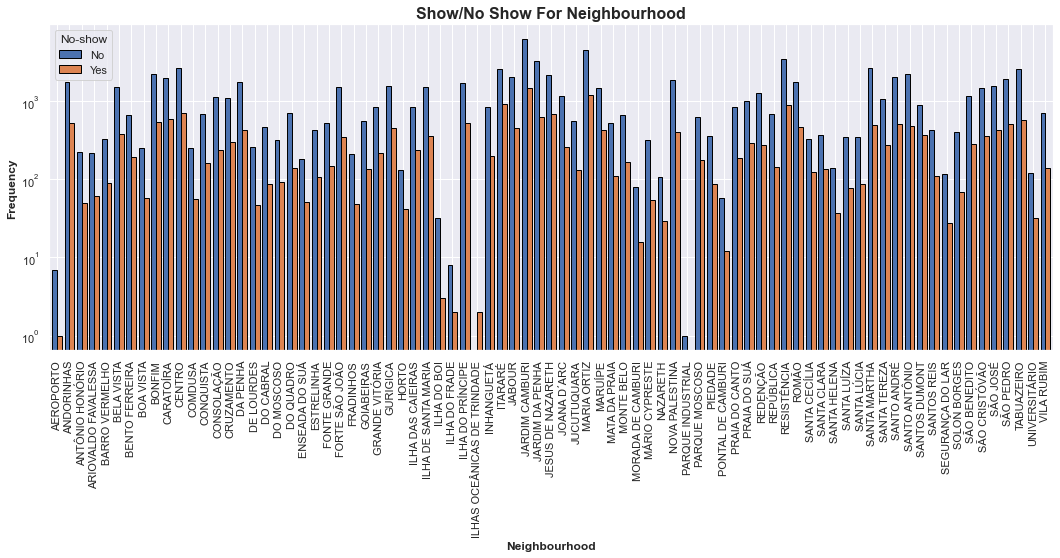

In [48]:
# Check the Show/No Show for Neighbourhood variable without normalizing the data
plot_bar(df, 'Neighbourhood', rot=90, figsize=(18,6), normalize=False, log=True)

- We can see that both Neighbourhoods "ILHAS OCEÂNICAS DE TRINDADE" and "PARQUE INDUSTRIAL" have counts less than 10.

In [49]:
# let's investigaye some more
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

- "ILHAS OCEÂNICAS DE TRINDADE" have only 2 patients both didn't attend the appointment.
- "PARQUE INDUSTRIAL" have only 1 patient did attend the appointment.
- From the above, <b>Neighbourhood Variable is not significant for the probabilty of Show/No Show.</b>

### 7- Scholarship Variable

- After checking https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia to better understand the variable, we can consider patients with scholarship are poor people and the patients without scholarship are not.

In [50]:
# Check appointement made by Rich people (0) and Poor people (1)
df['Scholarship'].value_counts()

0    99660
1    10861
Name: Scholarship, dtype: int64

- About 90% of the people made an appointment are without a Scholarship which means they are not poor and not enrolled in <b>Bolsa Familia Program.</b>

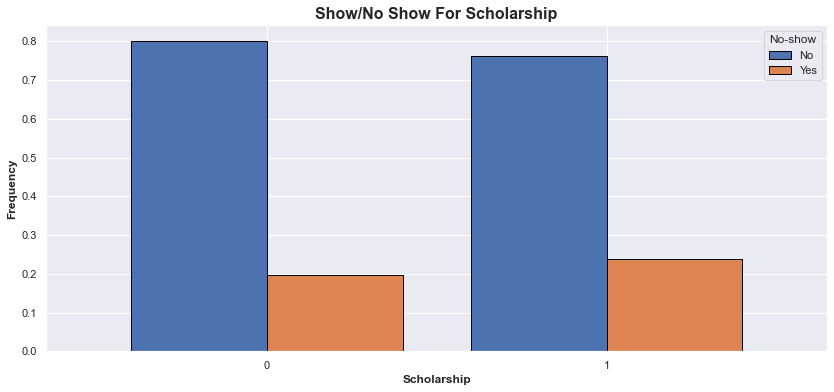

In [51]:
# Check the Show/No Show for Scholarship variable (after normalizing the numbers)
plot_bar(df, 'Scholarship');

- The probability of No Show increase for poor people.
- <b>The Scholarship variable is significant for the probabilty of Show/No Show.</b>

### 8- Hipertension Variable

In [52]:
# Check if Hipertension patients are balanced 
df['Hipertension'].value_counts()

0    88720
1    21801
Name: Hipertension, dtype: int64

- Data set is not balanced.

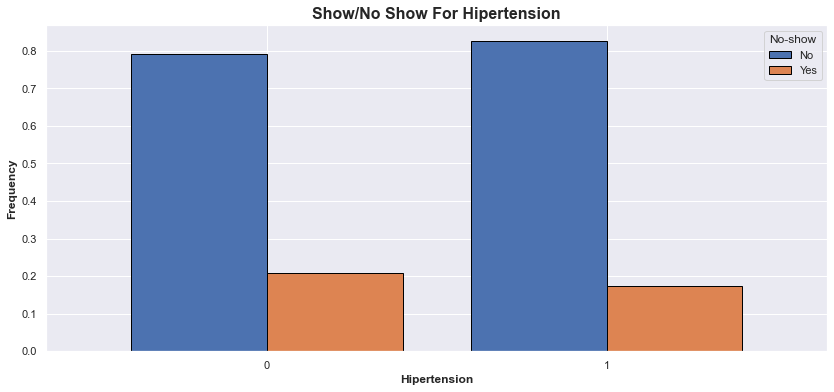

In [53]:
# Check the Show/No Show for Hipertension variable (after normalizing the numbers)
plot_bar(df, 'Hipertension')

- The probability of No Show decrease for patient with Hipertension.
- <b>The Hipertension variable is significant for the probabilty of Show/No Show.</b>

### 9- Diabetes Variable

In [54]:
# Check if Diabetes patients are balanced 
df['Diabetes'].value_counts()

0    102578
1      7943
Name: Diabetes, dtype: int64

- Diabetes patients are not balanced.

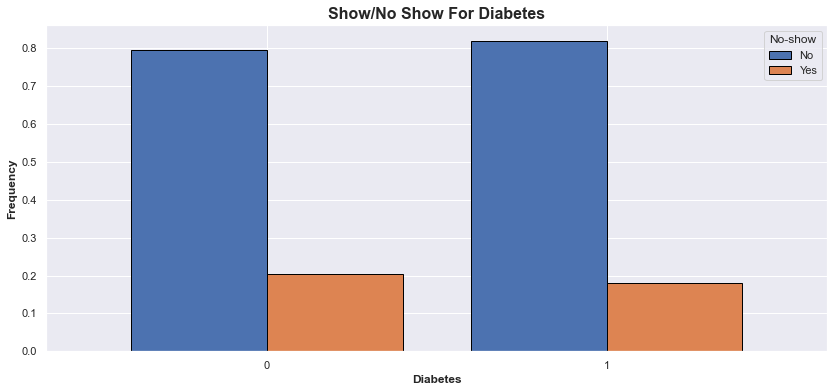

In [55]:
# Check the Show/No Show for Diabetes patients (after normalizing the numbers)
plot_bar(df, 'Diabetes')

- The probability of No Show decrease for patient with Diabetes.
- <b>The Diabetes variable is significant for the probabilty of Show/No Show.</b>

### 10- Alcoholism Variable

In [56]:
# Check if Alcoholism patients are balanced 
df['Alcoholism'].value_counts()

0    107161
1      3360
Name: Alcoholism, dtype: int64

- Alcoholism patients are not balanced.

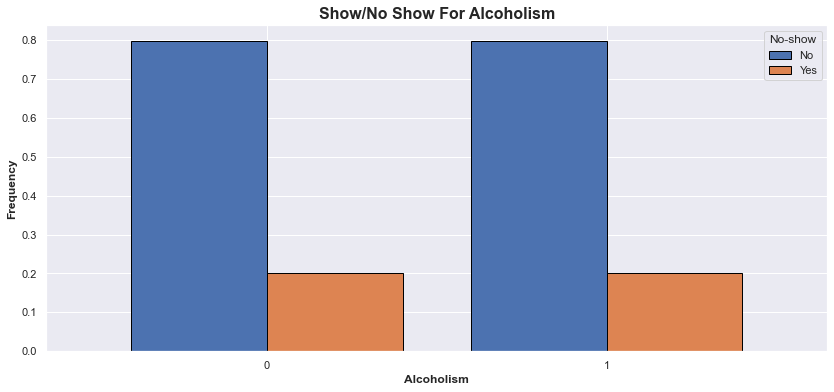

In [57]:
# Check the Show/No Show for Alcoholism patients (after normalizing the numbers)
plot_bar(df, 'Alcoholism')

- Alcoholism patients and None Alcoholism patients have the same probability of Show/No Show.
- <b>The Alcoholism variable is not significant for the probabilty of Show/No Show.</b>

### 11- Handcap Variable

In [58]:
#check data set for patient made an appointement with or without Handicap condition
df['Handcap'].value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: Handcap, dtype: int64

- Most of the Patient doesn't have a handicap condition.

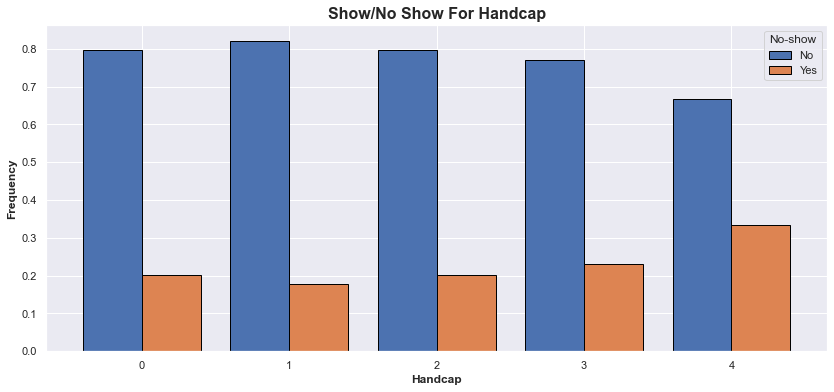

In [59]:
# Probabilty of Show/No Show for Handicap (after normalizing the numbers)
plot_bar(df, 'Handcap')

- Patients with one handicap condition are most likely to show up.
- Patients with three or four handicap condition are most likely to No Show.
- <b>Number of Handcap condition in a patient is a significant for the probabilty of Show/No Show</b>

### 12- MultiDisease Variable

In [60]:
# add a column for number of disease in each patient
df['MultiDisease'] = df['Hipertension'] + df['Diabetes'] + df['Alcoholism']

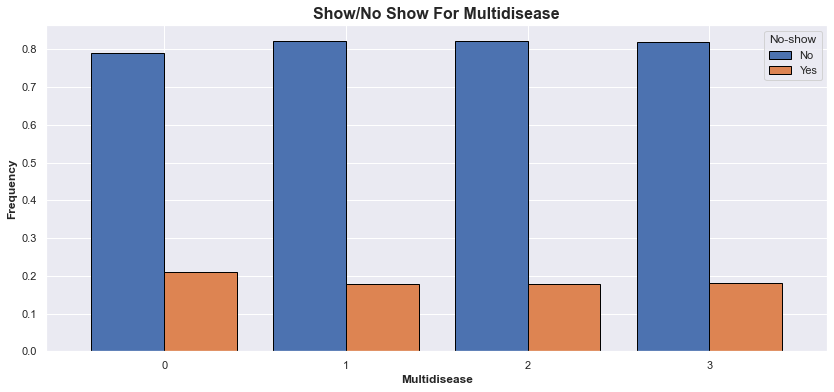

In [61]:
# Check if the probability of Show/No Show of patient according to the number of disease they have
plot_bar(df, 'MultiDisease')

- the probability of No Show more likely with the patient with no disease.
- <b>MultiDisease Variable is significant for the probabilty of Show/No Show</b>

### 13- SMS_received Variable

In [62]:
# Check the number of patients received / didn't receive sms
df.SMS_received.value_counts()

0    75039
1    35482
Name: SMS_received, dtype: int64

- Most of patient didnot receive a SMS.

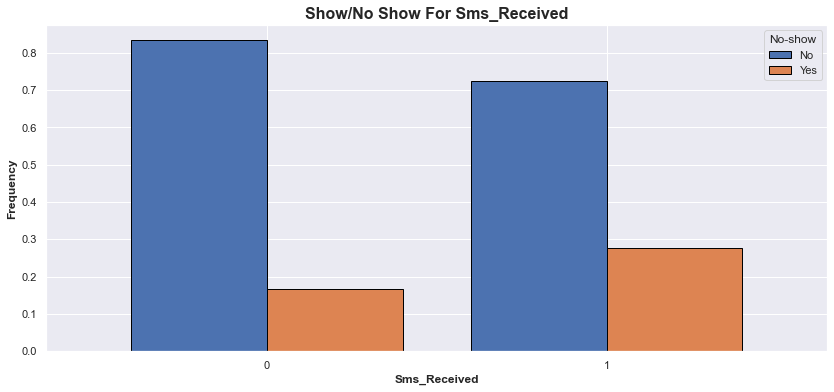

In [63]:
# Check the probabily of patients Show/No Show according to SMS_received variable
plot_bar(df, 'SMS_received')

- since most of No Show patients did receive an SMS, SMS_Received has no effect on the probabilty of Show/No Show
- <b>SMS_Received Variable is not significant for the probabilty of Show/No Show</b>

In [64]:
df.head(1)

,PatientId,AppointmentID,Gender,Age,ScheduledDay,AppointmentDay,WeekDay,AwaitingDay(s),Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_Group,AwaitingDaysIntervals,MultiDisease
0,29872499824296,5642903,F,62,2016-04-29,2016-04-29,Friday,0,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior,Same day,1


<a id='limitations'></a>
## Limitations

During the data set analysis some limitations where found and need to be addressed for better prediction of the probability for No-Show.

>Data Scope is limited, according to https://www.worldometers.info/world-population/brazil-population/ the population of Brazil in 2016 was 206,163,053 given a sample of only 62298 patient is too small and does not represent all the population.

>The AppointmentDay spans just over a month which means that the sample doesn't represent the all data, this would greatly effect our analysis and predection (at least a whole year data needed). 

>AppointmentDay attribute didn't give us the actual time of the appointment which might have a great impact on the probabilty of Show/No Show.

>Data set didn't tell us the reason for appiontment or the patient symptoms, this would help us in predicting the attending of the appointment.

>Data set didn't tell us the distance betweer the patient homes and the hospitals or the hospitals capabilities.

>Some unrealistic data was dropped from the data set like Negative Age and Appointment Date prior to schedule Date. 

<a id='conclusions'></a>
## Conclusions


><b>Result1: </b>PatientId and AppointmentID has no effect on Show/No Show of the patient.

><b>Result2: </b>Gender is not significant variable for the probability of Show/No Show.

><b>Result3: </b>Age Group is a significant variable for the probabilty of Show/No Show.
    
><b>Result4: </b>The probability of attending appointment decreases during Weekends.
    
><b>Result5: </b>The Awaiting Days is a great significant variable for the probabilty of Show/No Show.

><b>Result6: </b>Neighbourhood Variable is not significant for the probabilty of Show/No Show.
    
><b>Result7: </b>Scholarship is important factor in predicting if a patient will show up for their scheduled appointment or not.<br>Not getting Scholarship increases the probability of attending the appointment.
    
><b>Result8: </b>The probabitity of attending appointment increases when patient have Hipertension.

><b>Result9: </b>The probabitity of attending appointments increases when the patient have Diabetes.
    
><b>Result10: </b>The Alcoholism variable is not significant for the probabilty of Show/No Show.
    
><b>Result11: </b>The probability of attending appointment decreases when patient have three or four Handcap condition.
    

><b>Result12: </b>Patients with multi disease condition most likely to not attend the appointment.
    
><b>Result13: </b>SMS_Received Variable is not significant for the probabilty of Show/No Show.